In [1]:
from io import BytesIO

import requests
from PIL import Image

In [2]:
def get_map(latitude=0, longitude=0, map_size=(0, 0), scale=0, points='', lines='', polygons='') -> None:
    params = {}
    if latitude and longitude:
        params['c'] = f"{latitude},{longitude}"
    if map_size[0] and map_size[1]:
        params['s'] = f"{map_size[0]}x{map_size[1]}"
    if scale:
        params['z'] = scale
    if points:
        params["pt"] = points
    if lines:
        params["ls"] = lines
    if polygons:
        params["pn"] = polygons
    try:
        print(requests.get(f'https://static.maps.2gis.com/1.0', params=params).url)
        response = requests.get(f'https://static.maps.2gis.com/1.0', params=params)

    except ConnectionError as exc:
        print(exc)
    else:
        if response.status_code == requests.codes.ok:
            display(Image.open(BytesIO(response.content)))
        else:
            response.raise_for_status()

https://static.maps.2gis.com/1.0?c=55.05888%2C82.91118&s=880x300&z=15


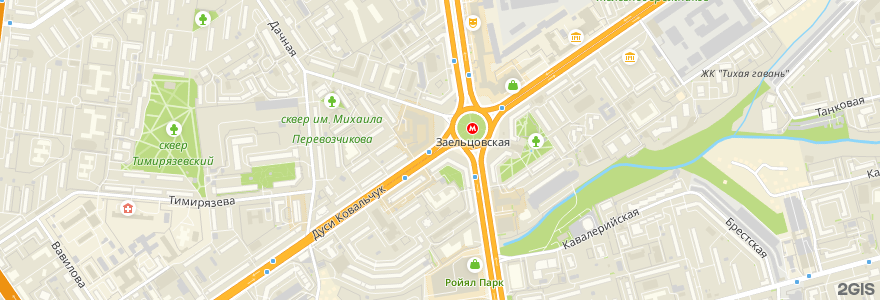

In [3]:
get_map(55.05888, 82.91118, (880, 300), 15)

https://static.maps.2gis.com/1.0?c=55.70433%2C37.5705&s=880x700&z=15&pt=55.70433%2C37.57050~k%3Ac~c%3Agn~s%3Al


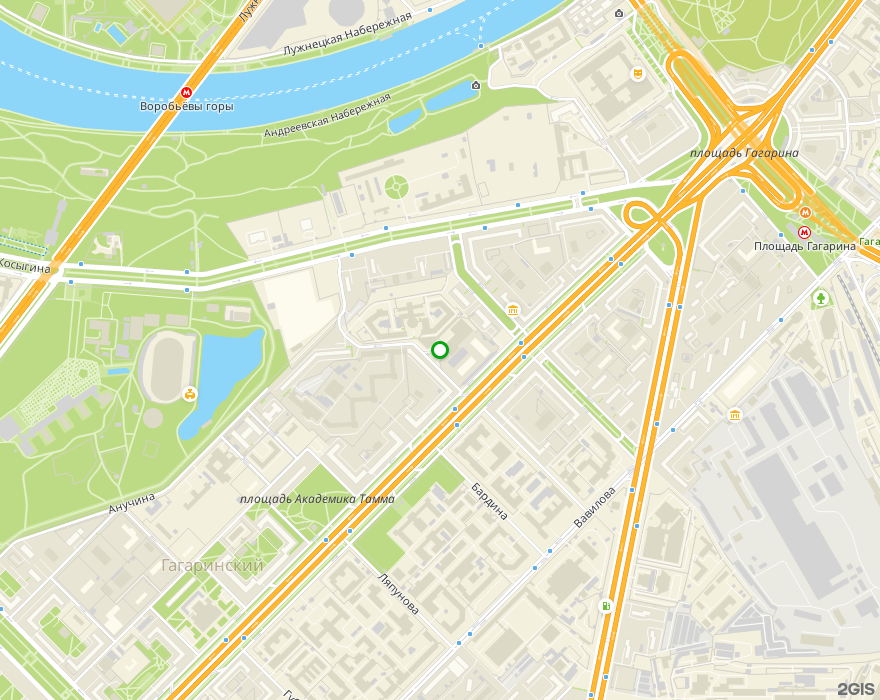

In [4]:
get_map(55.70433, 37.57050, (880, 700), 15, '55.70433,37.57050~k:c~c:gn~s:l')

https://static.maps.2gis.com/1.0?c=55.70433%2C37.5655&s=880x1000&z=15&pt=55.71433%2C37.56050~n%3A1&pt=55.70433%2C37.57050~k%3Ac~n%3A2


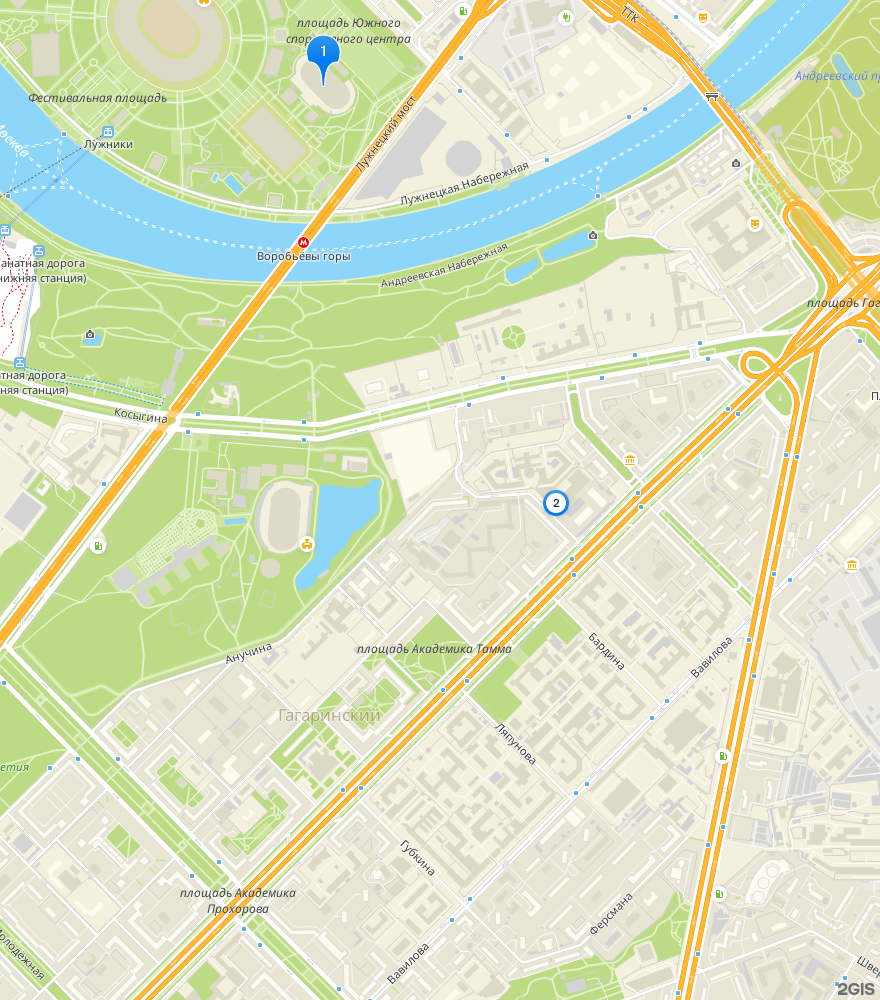

In [5]:
get_map(55.70433, 37.56550, (880, 1000), 15, ['55.71433,37.56050~n:1', '55.70433,37.57050~k:c~n:2'])

https://static.maps.2gis.com/1.0?s=880x300&ls=55.73740%2C37.52284%2C55.74033%2C37.53542%2C55.72481%2C37.55050~w%3A5&ls=55.72481%2C37.55050%2C55.71790%2C37.56943%2C55.72634%2C37.58097~c%3Aa23fb5~w%3A5


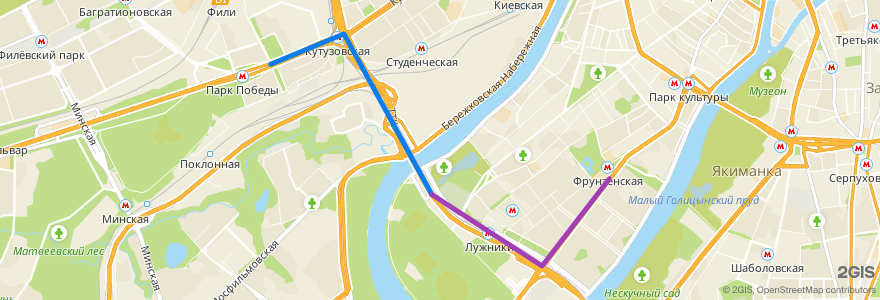

In [6]:
get_map(map_size=(880, 300), lines=['55.73740,37.52284,55.74033,37.53542,55.72481,37.55050~w:5', '55.72481,37.55050,55.71790,37.56943,55.72634,37.58097~c:a23fb5~w:5'])

https://static.maps.2gis.com/1.0?s=880x300&pn=59.99051%2C30.19207%2C59.99284%2C30.20503%2C59.98907%2C30.20292~c%3A22fe46~f%3A22fe46a1~w%3A2&pn=59.99233%2C30.20822%2C59.99121%2C30.21735%2C59.98738%2C30.21537%2C59.98856%2C30.20592~w%3A5&pn=59.99054%2C30.21812%2C59.98655%2C30.22571%2C59.98773%2C30.21646~c%3Aed3125~f%3Aed3125


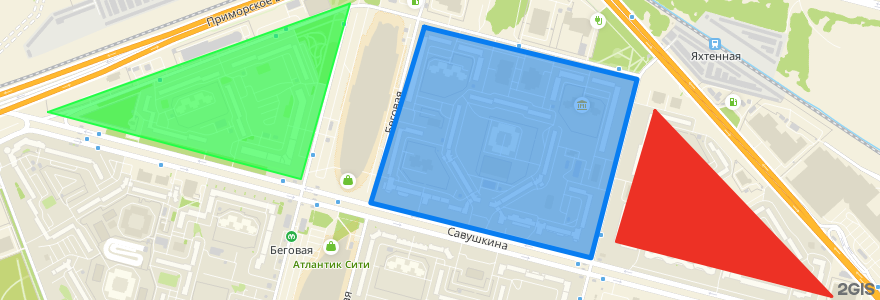

In [7]:
get_map(map_size=(880, 300), polygons=['59.99051,30.19207,59.99284,30.20503,59.98907,30.20292~c:22fe46~f:22fe46a1~w:2', '59.99233,30.20822,59.99121,30.21735,59.98738,30.21537,59.98856,30.20592~w:5', '59.99054,30.21812,59.98655,30.22571,59.98773,30.21646~c:ed3125~f:ed3125'])